In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyrsm as rsm

county_data = pd.read_csv("/home/jovyan/Documents/Rady/MGTA 452/Project_dataset.csv")
county_df = pd.DataFrame(county_data)


In [94]:
od_mean_20 = county_df['drug_od_count_2020'].sum() / len(county_df['County'])
od_mean_21 = county_df['drug_od_count_2021'].sum() / len(county_df['County'])
od_mean_22 = county_df['drug_od_count_2022'].sum() / len(county_df['County'])
od_mean_23 = county_df['drug_od_count_2023'].sum() / len(county_df['County'])


od_median_20 = county_df['drug_od_count_2020'].median()
od_median_21 = county_df['drug_od_count_2021'].median()
od_median_22 = county_df['drug_od_count_2022'].median()
od_median_23 = county_df['drug_od_count_2023'].median()

od_max_20 = county_df['drug_od_count_2020'].max()
od_max_21 = county_df['drug_od_count_2021'].max()
od_max_22 = county_df['drug_od_count_2022'].max()
od_max_23 = county_df['drug_od_count_2023'].max()


print(f"2020 Avg Drug ODs: {od_mean_20:.0f}")
print(f"2021 Avg Drug ODs: {od_mean_21:.0f}")
print(f"2022 Avg Drug ODs: {od_mean_22:.0f}")
print(f"2023 Avg Drug ODs: {od_mean_23:.0f}")

print(f"2020 Median Drug ODs: {od_median_20:.0f}")
print(f"2021 Median Drug ODs: {od_median_21:.0f}")
print(f"2022 Median Drug ODs: {od_median_22:.0f}")
print(f"2023 Median Drug ODs: {od_median_23:.0f}")

print(f"2020 Max Drug ODs: {od_max_20:.0f}")
print(f"2021 Max Drug ODs: {od_max_21:.0f}")
print(f"2022 Max Drug ODs: {od_max_22:.0f}")
print(f"2023 Max Drug ODs: {od_max_23:.0f}")


2020 Avg Drug ODs: 27
2021 Avg Drug ODs: 32
2022 Avg Drug ODs: 32
2023 Avg Drug ODs: 31
2020 Median Drug ODs: 6
2021 Median Drug ODs: 7
2022 Median Drug ODs: 7
2023 Median Drug ODs: 7
2020 Max Drug ODs: 1937
2021 Max Drug ODs: 2238
2022 Max Drug ODs: 2345
2023 Max Drug ODs: 2238


Text(0.5, 1.0, 'Distribution of opioid dispensing rates by county (2023)')

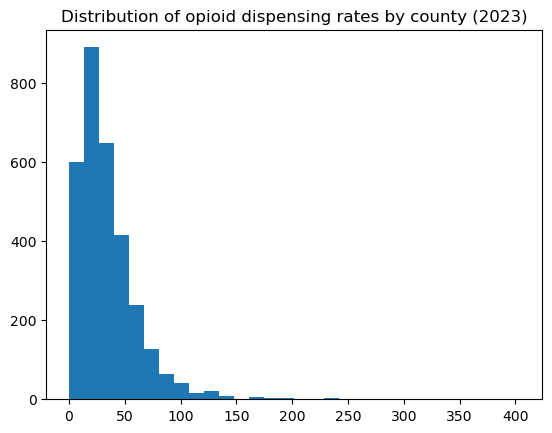

In [95]:
plt.hist(county_df['opioid_dispensing_rate_2023'], bins=30)
plt.title('Distribution of opioid dispensing rates by county (2023)')


Text(0.5, 1.0, 'OD Rate vs unemployment')

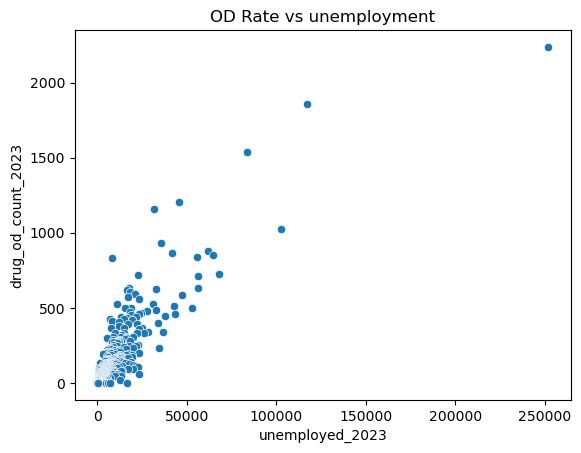

In [96]:
sns.scatterplot(
    x=county_df['unemployed_2023'],
    y=county_df['drug_od_count_2023']
)
plt.title("OD Rate vs unemployment")


Text(0.5, 1.0, 'Distribution of OD rates by county (2023)')

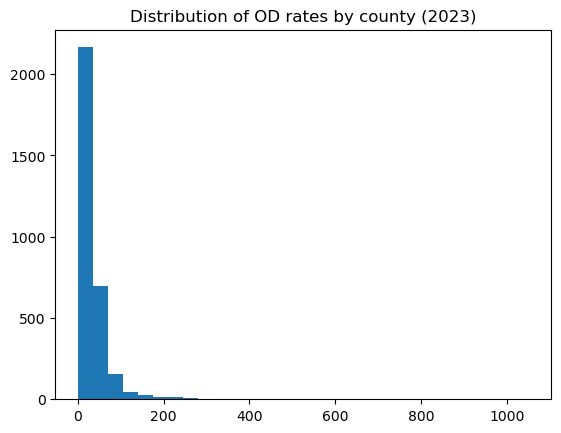

In [97]:
plt.hist(county_df['od_rate_2023_per100k'], bins=30)
plt.title('Distribution of OD rates by county (2023)')

Text(0.5, 1.0, 'SAMSHA Count to OD rate')

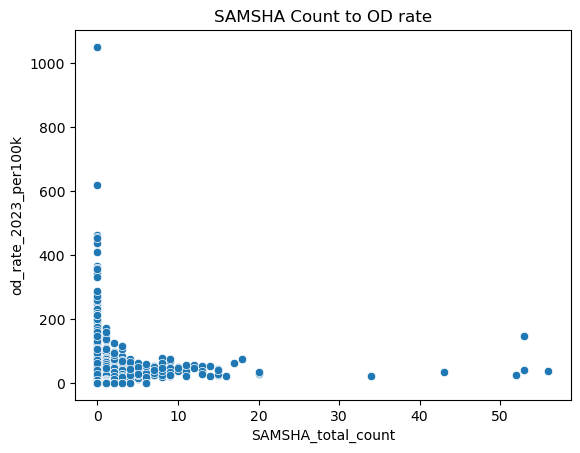

In [98]:
sns.scatterplot(
    x=county_df['SAMSHA_total_count'],
    y=county_df['od_rate_2023_per100k']
)
plt.title("SAMSHA Count to OD rate")


In [ ]:
median_income = county_df['median_household_income_2023'].median()

county_df['od_rate_per_100k'] = (county_df['drug_od_count_2023'] / county_df['population_2023']) * 100000

county_df['below_median_income'] = (county_df['median_household_income_2023'] < median_income).astype(int)

below_median = county_df[county_df['below_median_income'] == 1]['od_rate_per_100k']
above_median = county_df[county_df['below_median_income'] == 0]['od_rate_per_100k']

t_stat, p_val = stats.ttest_ind(below_median, above_median, equal_var=False)

print(f"National Median Income: ${median_income:,.0f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")
print(f"Mean OD rate (below median): {below_median.mean():.2f}")
print(f"Mean OD rate (above median): {above_median.mean():.2f}")

if p_val < 0.05:
    print("Reject H0: OD rates are significantly different between income groups.")
    if below_median.mean() > above_median.mean():
        print("Counties below median income have significantly higher OD rates.")
    else:
        print("Counties below median income have significantly lower OD rates.")
else:
    print("Fail to reject H0: No significant difference in OD rates between income groups.")

National Median Income: $62,784
T-statistic: 6.993
P-value: 0.00000
Mean OD rate (below median): 37.83
Mean OD rate (above median): 26.49
Reject H0: OD rates are significantly different between income groups.
Counties below median income have significantly higher OD rates.


In [ ]:
low_income_df = county_df[county_df['median_household_income_2023'] < 68000]

low_inc_with_clinic = low_income_df[low_income_df['SAMSHA_total_count'] > 0]['od_rate_2023_per100k']
low_inc_no_clinic   = low_income_df[low_income_df['SAMSHA_total_count'] == 0]['od_rate_2023_per100k']

t2, p2 = stats.ttest_ind(low_inc_with_clinic, low_inc_no_clinic, equal_var=False)

print(f"T-statistic: {t2:.3f}")
print(f"P-value: {p2:.5f}")
print(f"Mean OD (clinic):    {low_inc_with_clinic.mean():.2f}")
print(f"Mean OD (no clinic): {low_inc_no_clinic.mean():.2f}")

if p2 < 0.05:
    effect = "LOWER" if low_inc_with_clinic.mean() < low_inc_no_clinic.mean() else "HIGHER"
    print(f"RESULT: Low-income counties WITH clinics have significantly {effect} OD rates.")
else:
    print("RESULT: Clinic access is NOT significantly associated with OD rates among low-income counties.")

T-statistic: 0.781
P-value: 0.43505
Mean OD (clinic):    37.16
Mean OD (no clinic): 35.72
RESULT: Clinic access is NOT significantly associated with OD rates among low-income counties.


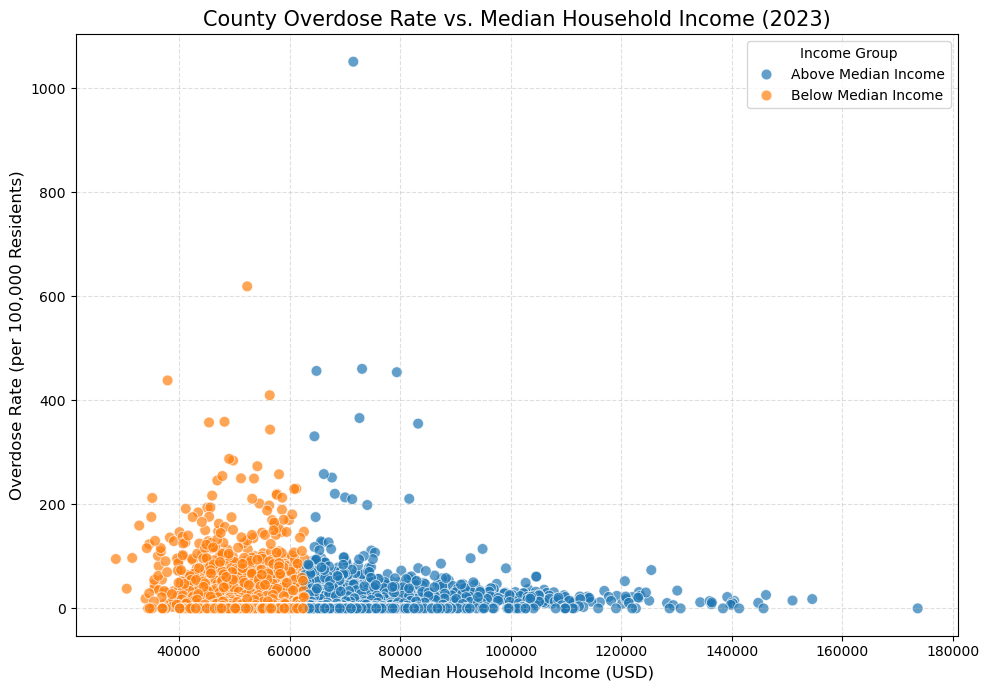

In [101]:
county_df['Income Group'] = county_df['median_household_income_2023'].apply(
    lambda x: 'Below Median Income' if x < median_income else 'Above Median Income'
)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=county_df,
    x='median_household_income_2023',
    y='od_rate_per_100k',
    hue='Income Group',
    palette={'Below Median Income': '#FF7F0E', 'Above Median Income': '#1F77B4'},
    alpha=0.7,
    edgecolor='white',
    s=60
)

# Titles and labels
plt.title('County Overdose Rate vs. Median Household Income (2023)', fontsize=15)
plt.xlabel('Median Household Income (USD)', fontsize=12)
plt.ylabel('Overdose Rate (per 100,000 Residents)', fontsize=12)
plt.legend(title='Income Group')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

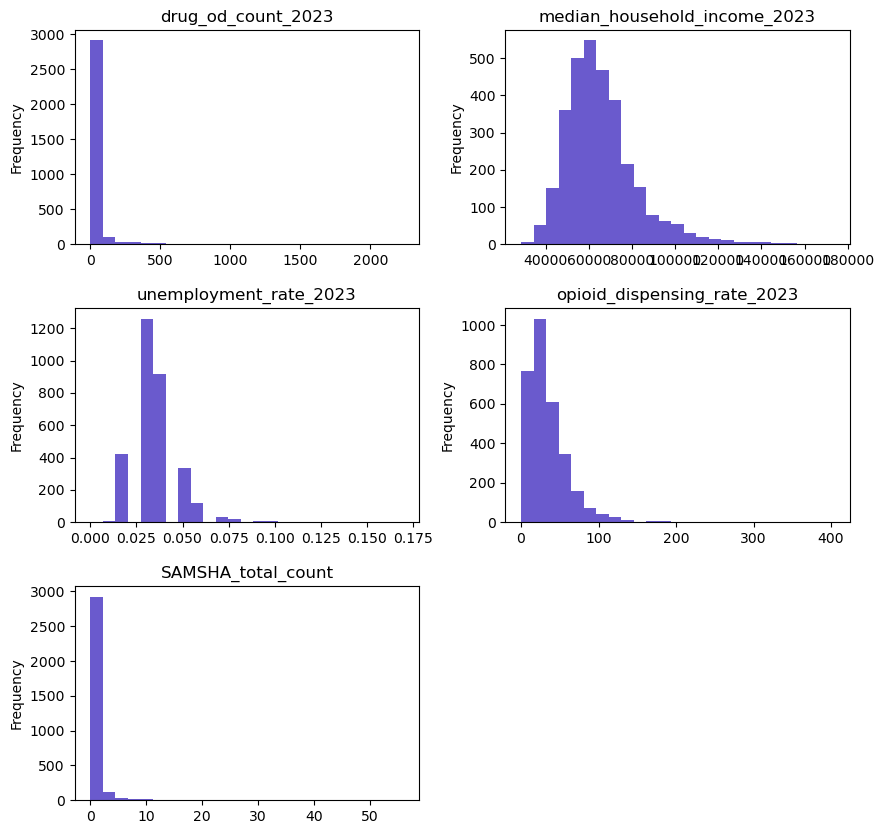

In [102]:
reg = rsm.model.regress(
    {"county_ods": county_df}, rvar="drug_od_count_2023", evar=["median_household_income_2023", "unemployment_rate_2023", "opioid_dispensing_rate_2023", "SAMSHA_total_count"]
)
reg.plot("dist")

In [103]:
reg.summary(vif=True)

Linear regression (OLS)
Data                 : county_ods
Response variable    : drug_od_count_2023
Explanatory variables: median_household_income_2023, unemployment_rate_2023, opioid_dispensing_rate_2023, SAMSHA_total_count
Null hyp.: the effect of x on drug_od_count_2023 is zero
Alt. hyp.: the effect of x on drug_od_count_2023 is not zero

                              coefficient  std.error  t.value p.value     
Intercept                         -43.255      6.952   -6.222  < .001  ***
median_household_income_2023        0.001      0.000    7.282  < .001  ***
unemployment_rate_2023            473.170     93.760    5.047  < .001  ***
opioid_dispensing_rate_2023         0.089      0.040    2.234   0.026    *
SAMSHA_total_count                 30.160      0.413   73.048  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.66, Adjusted R-squared: 0.66
F-statistic: 1495.327 df(4, 3076), p.value < 0.001
Nr obs: 3,081 (54 obs. dropped)

Variance inflat